# Early Model Testing

In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time

### Load dataset

In [2]:
input_file_name = "Kromberk_A+_10h.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

original_data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)
originalSize = original_data.shape[1]
original_data.head()

,id14061671,id14061684,id14061709,id14061716,id14061685,id14061674,id14061721,id14061680,id14061714,id11010024,...,10h_veter_vek_smer,10h_veter_max_hitrost,10h_energija_gl,10h_energija_di,10h_HourOfDay,10h_DayOfWeek,10h_Month,10h_Weekday,10h_Weekend,10h_BusinessDay
2011-01-01 00:30:00,0,0,75,15,37,18,13,4,0,1,...,102.0,0.80,116.0,110.0,10,5,1,0,1,0
2011-01-01 00:45:00,0,0,79,15,33,17,10,4,0,0,...,109.0,0.75,126.0,123.0,10,5,1,0,1,0
2011-01-01 01:00:00,0,0,77,15,32,21,12,4,0,0,...,116.0,0.70,136.0,136.0,11,5,1,0,1,0
2011-01-01 01:15:00,0,0,81,16,36,19,13,4,0,1,...,195.5,0.60,160.5,155.5,11,5,1,0,1,0
2011-01-01 01:30:00,0,0,82,14,34,18,10,4,0,0,...,275.0,0.50,185.0,175.0,11,5,1,0,1,0


## Excluding Testing Set

Spliting the dataset into three parts: training, testing and evaluation (last 10 percent).

In [3]:
start_time = '2013-01-01 00:00:00'
splitting_point = int(0.9 * original_data.shape[0])
splitting_time = original_data.iloc[[splitting_point]].index.to_pydatetime()[0]
data = original_data[:splitting_time]
#data = original_data[start_time:splitting_time]
testing_data = original_data[splitting_time:] # chunk of original data, reserved for testing purpuses

print "Original Dataset" + original_data.index.summary()
print "Training Dataset: " + data.index.summary()
print "Testing Dataset: " + testing_data.index.summary()

Original DatasetDatetimeIndex: 143286 entries, 2011-01-01 00:30:00 to 2015-02-01 13:45:00
Training Dataset: DatetimeIndex: 128958 entries, 2011-01-01 00:30:00 to 2014-09-05 07:45:00
Testing Dataset: DatetimeIndex: 14329 entries, 2014-09-05 07:45:00 to 2015-02-01 13:45:00


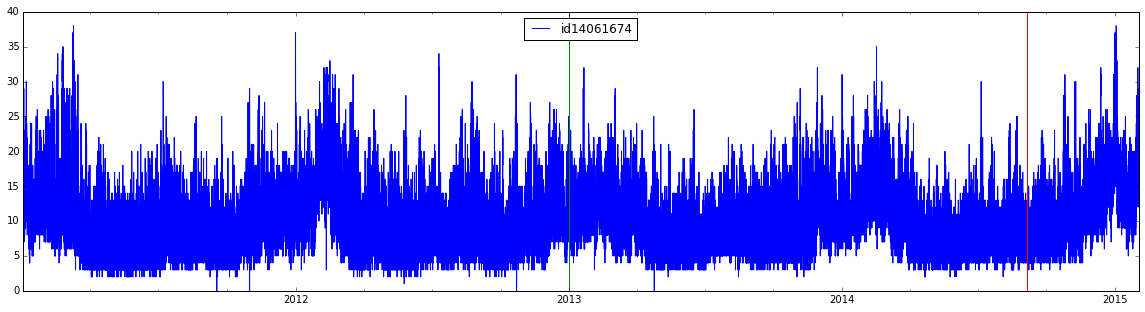

In [4]:
f = original_data[["id14061674"]].plot(figsize=(20,5)) 
original_data.iloc(splitting_point)
f.axvline(start_time, color='g')
f.axvline(splitting_time, color='r')

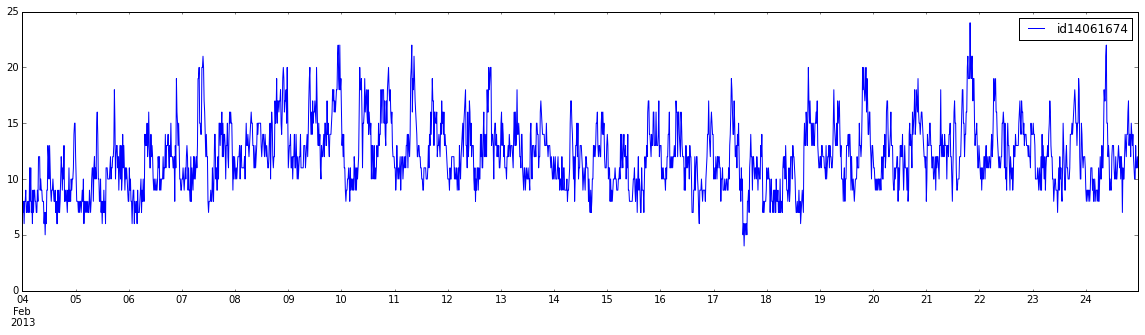

In [5]:
data['2013-02-04':'2013-02-24'][["id14061674"]].plot(figsize=(20,5))  

## Creating Feature Sets

In [6]:
sensor_cols = [col for col in list(data) if col.startswith('id')] # get all sensor column names
sensors_low_cols = sensor_cols[:sensor_cols.index('id12041022')] # get low level sensor column names
sensors_high_cols = sensor_cols[sensor_cols.index('id12041022'):] # get high level sensor names
wetaher_current_cols =  ['p', 'pmin', 'pmax', 't2m_termin', 't2m', 't2mmin', 't2mmax', 'rh_termin', 'rh', 'rhmin', 'rhmax', 'padavine',
                         'veter_hitrost', 'veter_vek_smer', 'veter_max_hitrost', 'energija_gl', 'energija_di']
weather_forecasted_cols =  ['10h_t2m_termin', '10h_rh_termin', '10h_rh_termin', '10h_padavine', '10h_veter_hitrost',
                            '10h_veter_vek_smer',  '10h_energija_gl']
date_time_cols =  ['10h_HourOfDay', '10h_DayOfWeek', '10h_Month', '10h_Weekday', '10h_Weekend', '10h_BusinessDay']

In [7]:
all_cols = sensors_low_cols + sensors_high_cols + wetaher_current_cols + weather_forecasted_cols + date_time_cols
sl_sh_wc_wf_cols = sensors_low_cols + sensors_high_cols + wetaher_current_cols + weather_forecasted_cols
sl_sh_wc_dt_cols = sensors_low_cols + sensors_high_cols + wetaher_current_cols + date_time_cols
sl_sh_wf_dt_cols= sensors_low_cols + sensors_high_cols + weather_forecasted_cols + date_time_cols
sl_sh_dt_cols = sensors_low_cols + sensors_high_cols + date_time_cols
sl_sh_cols = sensors_low_cols + sensors_high_cols + date_time_cols
wc_wf_dt_cols = ['id14061674'] + wetaher_current_cols + weather_forecasted_cols + date_time_cols
dt_cols = ['id14061674'] + date_time_cols

In [8]:
target_cols = '10h_id14061674'

## Define Machine Learning Models and Data Sets

In [9]:
models = [{'name': "Ridge Regression", 'init': "linear_model.Ridge()"},
          {'name': "K Nearest Neighbors", 'init': "neighbors.KNeighborsRegressor(n_neighbors = 5)"},
          {'name': "Random Forest", 'init': "RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)"},
          #{'name': "SVR", 'init': "svm.SVR(kernel ='rbf', C = 10, gamma = .001)"},
          #{'name': "Neural Network", 'init': "PyBrainNN(hidden_size = 100, learningrate = 0.001, momentum = 0.1, maxEpochs=10)"}
          ]

data_sets = [{'name': "ALL", 'train': data[all_cols], 'test': testing_data[all_cols]},
             {'name': "SL_SH_WC_WF", 'train': data[sl_sh_wc_wf_cols], 'test': testing_data[sl_sh_wc_wf_cols]},
             #{'name': "SL_SH_WF_DT", 'train': data[sl_sh_wf_dt_cols], 'test': testing_data[sl_sh_wf_dt_cols]},
             #{'name': "SL_SH_WC_DT", 'train': data[sl_sh_wc_dt_cols], 'test': testing_data[sl_sh_wc_dt_cols]},
             {'name': "SL_SH_DT", 'train': data[sl_sh_dt_cols], 'test': testing_data[sl_sh_dt_cols]},
             #{'name': "SL_SH", 'train': data[sl_sh_cols], 'test': testing_data[sl_sh_cols]},
             {'name': "WC_WF_DT", 'train': data[wc_wf_dt_cols], 'test': testing_data[wc_wf_dt_cols]},
             {'name': "DT", 'train': data[dt_cols], 'test': testing_data[dt_cols]},
             ]

target = {'name': target_cols, 'train': data[[target_cols]], 'test': testing_data[[target_cols]]}

results_df = pd.DataFrame(index=pd.MultiIndex.from_arrays([[],[],[]], names=['model', 'subset','idx']))

## Cross Validation

Including Scikit-Learn: machine learning in Python

In [10]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

In [11]:
num_of_elements = data.shape[0]
cv = cross_validation.ShuffleSplit(num_of_elements, n_iter=3, test_size=0.2, random_state=0)

for model in models:
    print "\nTraining " + model['name'] + " model..."
    svc = eval(model['init'])

    for data_set in data_sets:
        print "-->Feature set:", data_set['name']
        X = data_set['train'].values
        #X = (eval(data_set['train'])).values # Old code, delete 
        y = target['train'].values.ravel()

        for idx, (train, test) in enumerate(cv):    
            start = time.time() # Start measuring time
            svc.fit(X[train], y[train])
            runtime = time.time() - start # Calculate runtime
            results_df.loc[(model['name'], "train", idx), data_set['name']] = svc.score(X[train], y[train])
            results_df.loc[(model['name'], "test", idx), data_set['name']] = svc.score(X[test], y[test])
            print("train score: {0:.3f}, test score: {1:.3f}, runtime: {2:.2f}s".format(
                svc.score(X[train], y[train]), svc.score(X[test], y[test]), runtime))     
        
#cross_validation_results_df
results_df


Training Ridge Regression model...
-->Feature set: ALL
train score: 0.409, test score: 0.401, runtime: 0.15s
train score: 0.407, test score: 0.406, runtime: 0.17s
train score: 0.406, test score: 0.411, runtime: 0.21s
-->Feature set: SL_SH_WC_WF
train score: 0.379, test score: 0.371, runtime: 0.15s
train score: 0.378, test score: 0.373, runtime: 0.15s
train score: 0.376, test score: 0.383, runtime: 0.15s
-->Feature set: SL_SH_DT
train score: 0.365, test score: 0.355, runtime: 0.10s
train score: 0.363, test score: 0.362, runtime: 0.10s
train score: 0.362, test score: 0.366, runtime: 0.10s
-->Feature set: WC_WF_DT
train score: 0.356, test score: 0.350, runtime: 0.10s
train score: 0.355, test score: 0.354, runtime: 0.09s
train score: 0.354, test score: 0.357, runtime: 0.09s
-->Feature set: DT
train score: 0.262, test score: 0.252, runtime: 0.04s
train score: 0.260, test score: 0.260, runtime: 0.04s
train score: 0.259, test score: 0.262, runtime: 0.04s

Training K Nearest Neighbors model..

ALL  SL_SH_WC_WF  SL_SH_DT  WC_WF_DT  \
model               subset idx                                              
Ridge Regression    train  0    0.408583     0.378747  0.364573  0.355690   
                    test   0    0.401121     0.370894  0.354842  0.350010   
                    train  1    0.407300     0.378060  0.362814  0.354582   
                    test   1    0.406029     0.373440  0.361838  0.354078   
                    train  2    0.406105     0.375719  0.361788  0.353866   
                    test   2    0.411032     0.383082  0.365980  0.357323   
K Nearest Neighbors train  0    0.725394     0.722787  0.638062  0.629083   
                    test   0    0.557735     0.553038  0.440066  0.423179   
                    train  1    0.726126     0.723316  0.637619  0.629627   
                    test   1    0.564375     0.558844  0.439831  0.426289   
                    train  2    0.723847     0.721399  0.638761  0.627746   
                    test   2    0.569615     0.566028  0.444607  0.433261   
Random Forest       train  0    0.830104     0.800369  0.772287  0.814287   
                    test   0    0.707068     0.655454  0.642810  0.698672   
                    train  1    0.832004     0.800801  0.772840  0.816277   
                    test   1    0.706462     0.650277  0.645585  0.696181   
                    train  2    0.830873     0.800462  0.771511  0.814817   
                    test   2    0.710487     0.657950  0.651537  0.699253   

                                      DT  
model               subset idx            
Ridge Regression    train  0    0.261677  
                    test   0    0.252248  
                    train  1    0.259848  
                    test   1    0.259508  
                    train  2    0.259293  
                    test   2    0.261812  
K Nearest Neighbors train  0    0.604070  
                    test   0    0.456500  
                    train  1    0.603595  
                    test   1    0.465549  
                    train  2    0.603326  
                    test   2    0.466592  
Random Forest       train  0    0.595088  
                    test   0    0.533296  
                    train  1    0.594503  
                    test   1    0.537177  
                    train  2    0.594445  
                    test   2    0.538984

Visualize results

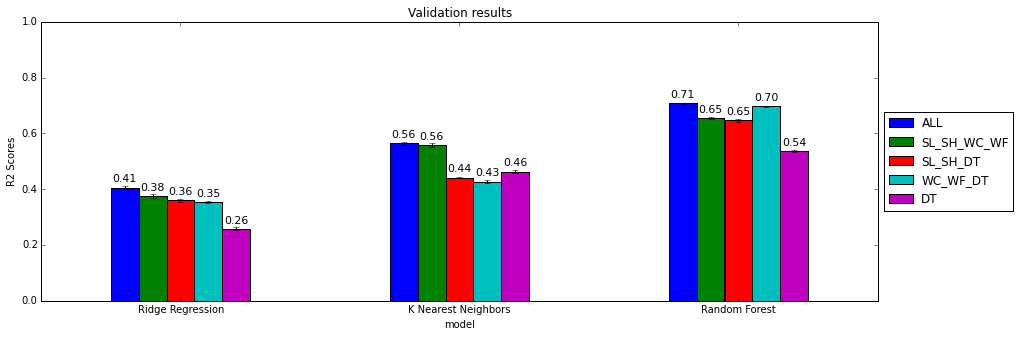

In [12]:
mean_df = results_df.groupby(level=('model', 'subset')).mean()
mean_df = mean_df.xs('test', level='subset') # Include only test data

std_df = results_df.groupby(level=('model', 'subset')).std()
std_df = std_df.xs('test', level='subset') # Include only test data

ax = mean_df.plot(yerr=std_df, kind='bar', rot=0, ylim=(0,1), figsize=(15, 5))

for p in ax.patches:
    ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() + 0.02), fontsize=11, ha='center')
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('R2 Scores')
plt.title('Validation results')

plt.show()

## Learning Curve

In [12]:
# Ref: http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
def plot_learning_curve(ax, estimator, X, y, title=None, xlabel=None, ylabel=None, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.grid()

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    #ax.legend(loc=4)
    
    return ax

Computionally very expensive!!


Working on Ridge Regression model...
-->Feature set: ALL
-->Feature set: SL_SH_WC_WF
-->Feature set: SL_SH_DT

Working on Random Forest model...
-->Feature set: ALL
-->Feature set: SL_SH_WC_WF
-->Feature set: SL_SH_DT

Working on K Nearest Neighbors model...
-->Feature set: ALL
-->Feature set: SL_SH_WC_WF
-->Feature set: SL_SH_DT


<function matplotlib.pyplot.show>

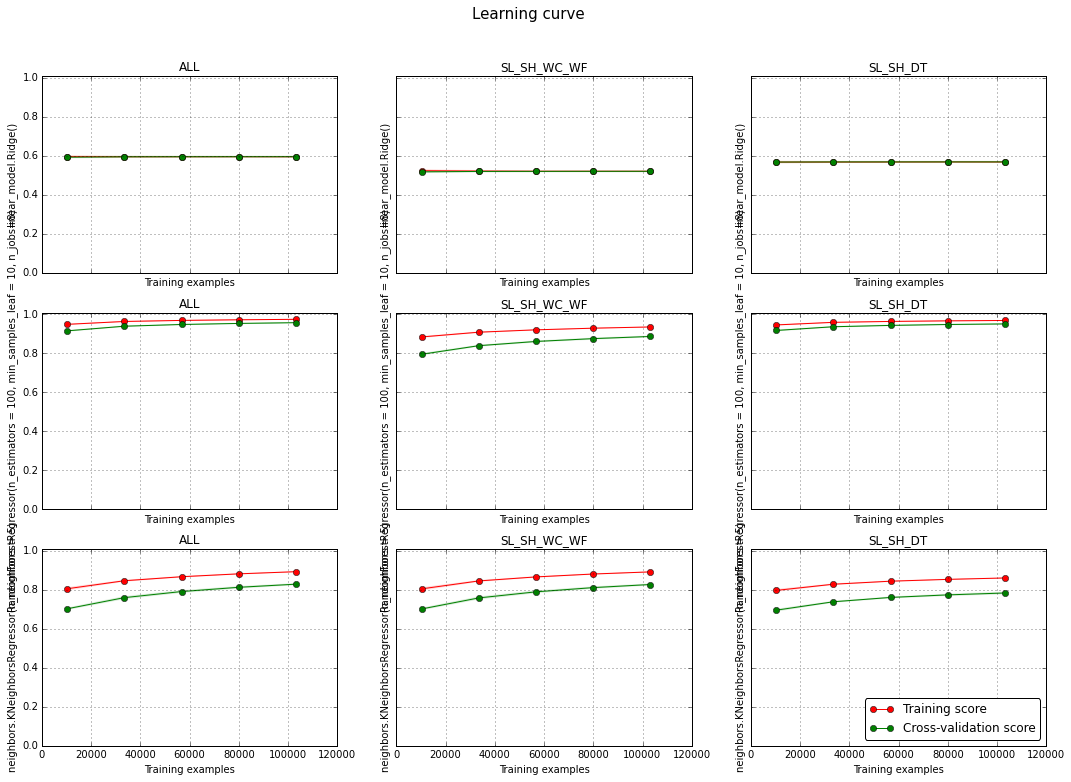

In [ ]:
f, axx = plt.subplots(len(models), len(data_sets), sharey=True, sharex=True)
f.set_size_inches(6*len(data_sets),4*len(models)) # f.set_size_inches(20,13)
plt.suptitle('Learning curve', fontsize=15)

for idx, model in enumerate(models):
    print "\nWorking on " + model['name'] + " model..."
    estimator = eval(model['init'])
    for idy, data_set in enumerate(data_sets):
        print "-->Feature set:", data_set['name']
        X = data_set['train'].values
        #X = (eval(data_set['train'])).values
        y = target['train'].values.ravel()
        
        cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
        plot_learning_curve(axx[idx,idy], estimator, X, y, data_set['name'], "Training examples", 
                            model['init'], (0.0, 1.01), cv=cv, n_jobs=4)

plt.legend(loc=4, fancybox=True)
plt.show

## Feature Importance

-->Feature set: ALL
-->Feature set: SL_SH_WC_WF
-->Feature set: SL_SH_DT
-->Feature set: WC_WF_DT
-->Feature set: DT


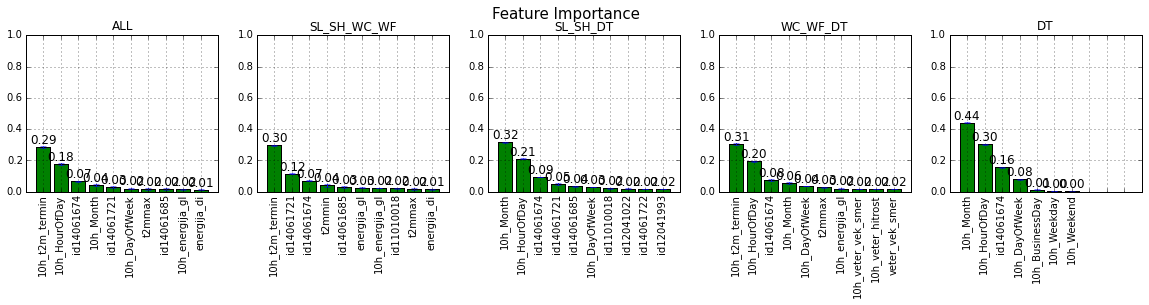

In [32]:
num_of_top_important_ftrs = 10;

fig, axes = plt.subplots(1, len(data_sets))
fig.set_size_inches(20,3)
plt.suptitle('Feature Importance', fontsize=15)
plt.subplots_adjust(top=.85)
plt.setp(axes, xticks=xrange(num_of_top_important_ftrs), xlim = [-1, num_of_top_important_ftrs], ylim=[0, 1])

model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)

for idx, data_set in enumerate(data_sets):
    print "-->Feature set:", data_set['name']
    X = data_set['train'].values
    y = target['train'].values.ravel()
    model.fit(X, y)
    
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:num_of_top_important_ftrs]
    ftr_size = num_of_top_important_ftrs if data_set['train'].shape[1] > num_of_top_important_ftrs else data_set['train'].shape[1] 
    
    for f in range(ftr_size):
        axes[idx].annotate( str("%.2f" % importances[indices[f]]), (f, importances[indices[f]] + 0.02), fontsize=12, ha='center')
    
    # Plot the feature importances of the forest
    axes[idx].set_title(data_set['name'])
    axes[idx].bar(xrange(ftr_size), importances[indices], color="g", yerr=std[indices], align="center")
    axes[idx].set_xticklabels(data_set['train'].columns[indices], rotation='vertical')
    axes[idx].grid(True)

#fig.tight_layout()
plt.show()

It is clearlly seen that weather features are very important. Prediction of energy radiation is the second most imporantant feature, right after the business day.

## Prediction Results


Training Ridge Regression model...
-->Feature set: ALL, train score: 0.407, test score: 0.311, runtime: 0.12s
-->Feature set: SL_SH_WC_WF, train score: 0.377, test score: 0.305, runtime: 0.13s
-->Feature set: SL_SH_DT, train score: 0.363, test score: 0.153, runtime: 0.10s
-->Feature set: WC_WF_DT, train score: 0.355, test score: 0.317, runtime: 0.11s
-->Feature set: DT, train score: 0.260, test score: 0.184, runtime: 0.01s

Training K Nearest Neighbors model...
-->Feature set: ALL, train score: 0.748, test score: -0.136, runtime: 1.47s
-->Feature set: SL_SH_WC_WF, train score: 0.745, test score: -0.135, runtime: 1.38s
-->Feature set: SL_SH_DT, train score: 0.650, test score: -0.228, runtime: 0.69s
-->Feature set: WC_WF_DT, train score: 0.645, test score: 0.056, runtime: 1.46s
-->Feature set: DT, train score: 0.589, test score: 0.235, runtime: 0.66s

Training Random Forest model...
-->Feature set: ALL, train score: 0.842, test score: 0.376, runtime: 94.98s
-->Feature set: SL_SH_WC_WF, 

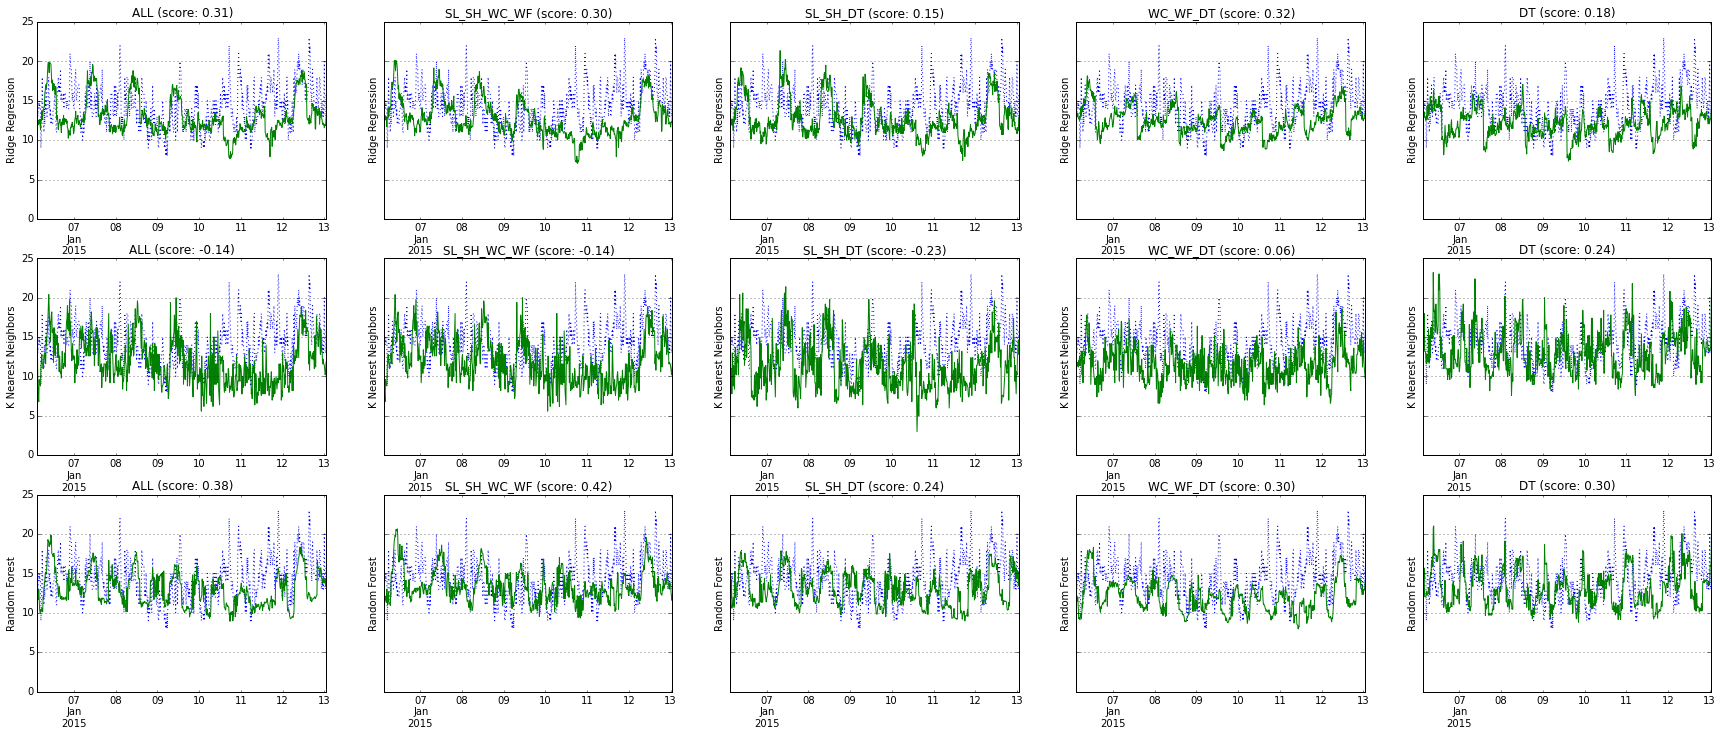

In [27]:
validation_df = pd.DataFrame(index=pd.MultiIndex.from_arrays([[],[]], names=['model', 'subset']))

f, axx = plt.subplots(len(models), len(data_sets), sharey=True, sharex=True)
f.set_size_inches(6*len(data_sets),4*len(models))
#plt.suptitle('Learning curve', fontsize=15)

for idx, mdl in enumerate(models):
    print "\nTraining " + mdl['name'] + " model..."
    model = eval(mdl['init'])
    
    for idy, data_set in enumerate(data_sets):
      
        X_train = data_set['train'].values
        y_train = target['train'].values.ravel()
        
        X_test = data_set['test'].values
        y_test = target['test'].values.ravel()
        
        start = time.time() # Start measuring time
        model.fit(X_train,y_train)
        runtime = time.time() - start # Calculate runtime
        
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test) 
        
        validation_df.loc[(mdl['name'], "train"), data_set['name']] = train_score
        validation_df.loc[(mdl['name'], "test"), data_set['name']] = test_score
            
        testing_data['Prediction'] = model.predict(X_test) 
        ax = testing_data['2015-01-06 03:00:00':'2015-01-13 01:00:00'][[target_cols,'Prediction']].plot(ax = axx[idx,idy], 
            title = (data_set['name'] + " (score: %0.2f)" % test_score), style=['b:','g-'], legend=False)
        ax.set_ylabel(mdl['name'])
        #ax.set_xlabel(data_set['name'])
        
        print("-->Feature set: {0}, train score: {1:.3f}, test score: {2:.3f}, runtime: {3:.2f}s".format(
            data_set['name'], train_score, test_score, runtime)) 

#plt.legend(loc='upper center', bbox_to_anchor=(-0.7, 2.5), ncol=4, fancybox=True, shadow=True)
#plt.figlegend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
#plt.legend().get_texts()[1].set_text('Baseline')
#plt.tight_layout()
plt.show()

In [30]:
validation_df

ALL  SL_SH_WC_WF  SL_SH_DT  WC_WF_DT  \
model               subset                                              
Ridge Regression    train   0.407147     0.377251  0.362660  0.354601   
                    test    0.310914     0.304661  0.153223  0.316501   
K Nearest Neighbors train   0.748184     0.745299  0.649587  0.645149   
                    test   -0.136301    -0.135464 -0.228035  0.055702   
Random Forest       train   0.841519     0.811660  0.781437  0.826738   
                    test    0.376125     0.421536  0.238869  0.295159   

                                  DT  
model               subset            
Ridge Regression    train   0.259802  
                    test    0.183863  
K Nearest Neighbors train   0.588893  
                    test    0.235252  
Random Forest       train   0.595084  
                    test    0.299112

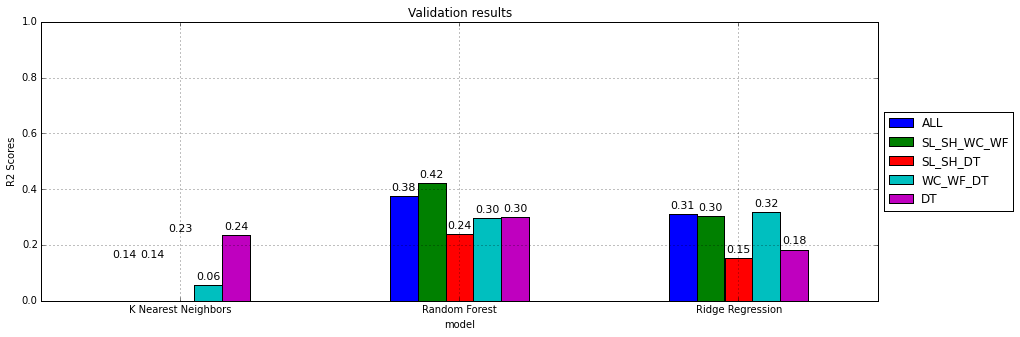

In [31]:
mean_df = validation_df.groupby(level=('model', 'subset')).mean()
mean_df = mean_df.xs('test', level='subset') # Include only test data

std_df = validation_df.groupby(level=('model', 'subset')).std()
std_df = std_df.xs('test', level='subset') # Include only test data

ax = mean_df.plot(yerr=std_df, kind='bar', rot=0, ylim=(0,1), figsize=(15, 5))

for p in ax.patches:
    ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() + 0.02), fontsize=11, ha='center')
    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('R2 Scores')
plt.title('Validation results')

plt.show()

NOTE: From this, it looks like weather does not help to improve accuracy. Date time features are the most important.